In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

import numpy as np
import matplotlib.pyplot as plt
import scipy

# IMPORT CUSTOM MODULES
import sys
sys.path.append("../")
from BAMVAE.MNISTLoader import MNIST_Loader
from BAMVAE.VAE1 import VAE, loss_function,complete_train_and_test,decompose_loss_function

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
device = torch.device("mps") # GPU acceleration for Mac

In [111]:
mnist=MNIST_Loader(bs=128,normalise=True,
    root_folder='../mnist_data')

train_dataset,test_dataset=mnist.__getdatasets__()
train_loader,test_loader=mnist.__getdataloaders__()

In [112]:
data=train_dataset.data[0].to(device)/1.
data=data.view(1,1,28,28)


In [113]:
###### DEBUG TO SUPPRIMER APRES
z_dim=1
dic_VAE={}
vae=VAE(name=f"VAE_{z_dim}_dim",z_dim=z_dim).to(device)
print(f"Training with {z_dim =} and nb params {vae.print_nb_params()} step {k+1}/{len(latent_dims)}")

optimizer= optim.Adam(vae.parameters(),lr=learning_rate)

###### TRAIN THE MODEL
train_losses,test_losses=complete_train_and_test(vae,train_loader=train_loader,
                            test_loader=test_loader,optimizer=optimizer,
                            nb_epochs=nb_epochs,view_latent=False,
                            test_dataset=test_dataset,
                            k1=0.5,k2=0.5)
##### Generating random images to test the FID
generated_images=vae.generate_from_noise(nb_images=1024)
gen_np=generated_images.detach().cpu().numpy().reshape(-1,28,28)
np.save(f"../generated_data/{vae.name}.npy",gen_np)
dic_VAE[z_dim]={"vae":vae,
                "optimizer":optimizer,
                "train_losses":train_losses,
                "test_losses":test_losses}

The model has 77 667 parameters
Training with z_dim =1 and nb params 77667 step 3/9
Train Epoch: 1 [0/60000 (0%)]	Loss: 299.020996
Train Epoch: 1 [12800/60000 (21%)]	Loss: -7500.431641
Train Epoch: 1 [25600/60000 (43%)]	Loss: -8326.231445
Train Epoch: 1 [38400/60000 (64%)]	Loss: -8135.157715
Train Epoch: 1 [51200/60000 (85%)]	Loss: -8411.213867
====> Epoch: 1 Average loss: -7686.6691
====> Test set loss: -8725.7373
Train Epoch: 2 [0/60000 (0%)]	Loss: -8724.806641
Train Epoch: 2 [12800/60000 (21%)]	Loss: -8470.588867
Train Epoch: 2 [25600/60000 (43%)]	Loss: -8847.289062
Train Epoch: 2 [38400/60000 (64%)]	Loss: -8745.761719
Train Epoch: 2 [51200/60000 (85%)]	Loss: -8832.882812
====> Epoch: 2 Average loss: -8885.7187
====> Test set loss: -9395.5131
Train Epoch: 3 [0/60000 (0%)]	Loss: -9255.976562
Train Epoch: 3 [12800/60000 (21%)]	Loss: -9351.460938
Train Epoch: 3 [25600/60000 (43%)]	Loss: -9355.897461
Train Epoch: 3 [38400/60000 (64%)]	Loss: -9986.882812
Train Epoch: 3 [51200/60000 (85%)

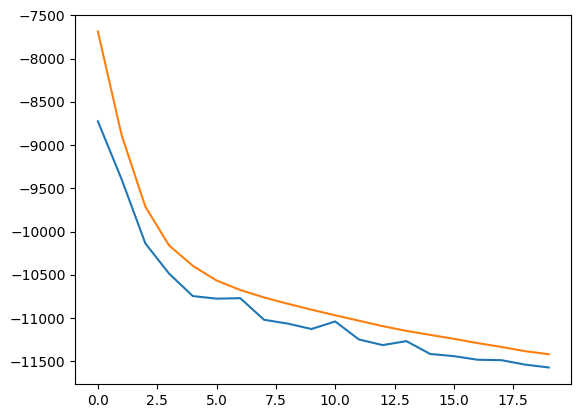

In [115]:
plt.plot(test_losses)
plt.plot(train_losses)

In [116]:
learning_rate=1e-3
nb_epochs=20
dic_VAE={}
latent_dims=[1,2,3,5,10,15,20,50,100]
for (k,z_dim) in enumerate(latent_dims):
    vae=VAE(name=f"VAE_{z_dim}_dim",z_dim=z_dim).to(device)
    print(f"Training with {z_dim =} and nb params {vae.print_nb_params()} step {k+1}/{len(latent_dims)}")

    optimizer= optim.Adam(vae.parameters(),lr=learning_rate)

    ###### TRAIN THE MODEL
    train_losses,test_losses=complete_train_and_test(vae,train_loader=train_loader,
                                test_loader=test_loader,optimizer=optimizer,
                                nb_epochs=nb_epochs,view_latent=False,
                                test_dataset=test_dataset,
                                k1=0.5,k2=0.5)
    ##### Generating random images to test the FID
    generated_images=vae.generate_from_noise(nb_images=1024)
    gen_np=generated_images.detach().cpu().numpy().reshape(-1,28,28)
    np.save(f"../generated_data/{vae.name}.npy",gen_np)
    dic_VAE[z_dim]={"vae":vae,
                    "optimizer":optimizer,
                    "train_losses":train_losses,
                    "test_losses":test_losses}
    

    

The model has 77 667 parameters
Training with z_dim =1 and nb params 77667 step 1/9
Train Epoch: 1 [0/60000 (0%)]	Loss: 278.048767
Train Epoch: 1 [12800/60000 (21%)]	Loss: -7827.691895
Train Epoch: 1 [25600/60000 (43%)]	Loss: -7820.477051
Train Epoch: 1 [38400/60000 (64%)]	Loss: -8266.776367
Train Epoch: 1 [51200/60000 (85%)]	Loss: -8723.366211
====> Epoch: 1 Average loss: -7537.0295
====> Test set loss: -8625.2590
Train Epoch: 2 [0/60000 (0%)]	Loss: -8128.854980
Train Epoch: 2 [12800/60000 (21%)]	Loss: -8523.433594
Train Epoch: 2 [25600/60000 (43%)]	Loss: -8477.792969
Train Epoch: 2 [38400/60000 (64%)]	Loss: -8864.305664
Train Epoch: 2 [51200/60000 (85%)]	Loss: -9088.944336
====> Epoch: 2 Average loss: -8937.9154
====> Test set loss: -9600.3890
Train Epoch: 3 [0/60000 (0%)]	Loss: -8768.080078
Train Epoch: 3 [12800/60000 (21%)]	Loss: -9561.246094
Train Epoch: 3 [25600/60000 (43%)]	Loss: -9984.483398
Train Epoch: 3 [38400/60000 (64%)]	Loss: -9620.229492
Train Epoch: 3 [51200/60000 (85%)

In [64]:
print(dic_VAE[2]["vae"].encFC1.weight.grad.shape)
dic_VAE[2]["vae"].encFC1.weight

torch.Size([2, 12800])


Parameter containing:
tensor([[    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [ 0.1175,  0.0808,  0.0592,  ...,  0.0051, -0.0017,  0.0010]],
       device='mps:0', requires_grad=True)

In [18]:
dic_VAE[2]["vae"]

VAE(
  (encConv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (encConv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (encFC1): Linear(in_features=12800, out_features=2, bias=True)
  (encFC2): Linear(in_features=12800, out_features=2, bias=True)
  (decFC1): Linear(in_features=2, out_features=12800, bias=True)
  (decConv1): ConvTranspose2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (decConv2): ConvTranspose2d(16, 1, kernel_size=(5, 5), stride=(1, 1))
)

In [43]:
dic_VAE[2]["train_losses"]

[104.04899458007813,
 87.58093518880209,
 84.12293965657553,
 82.00679280598958,
 80.34992093098958,
 79.25379302571615,
 78.35940744628907,
 77.5935760172526,
 76.97023321940104,
 76.39149999186198,
 76.07014699707031,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]